Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

Load the Training and Test Datasets

In [2]:
train_df = pd.read_csv('/src/data/raw/train.csv')
test_df = pd.read_csv('/src/data/raw/test.csv')

Train the Model

In [3]:
clf = IsolationForest(random_state=42)

In [4]:
clf.fit(train_df)

IsolationForest(random_state=16)

Draw the Model’s Decision Function

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


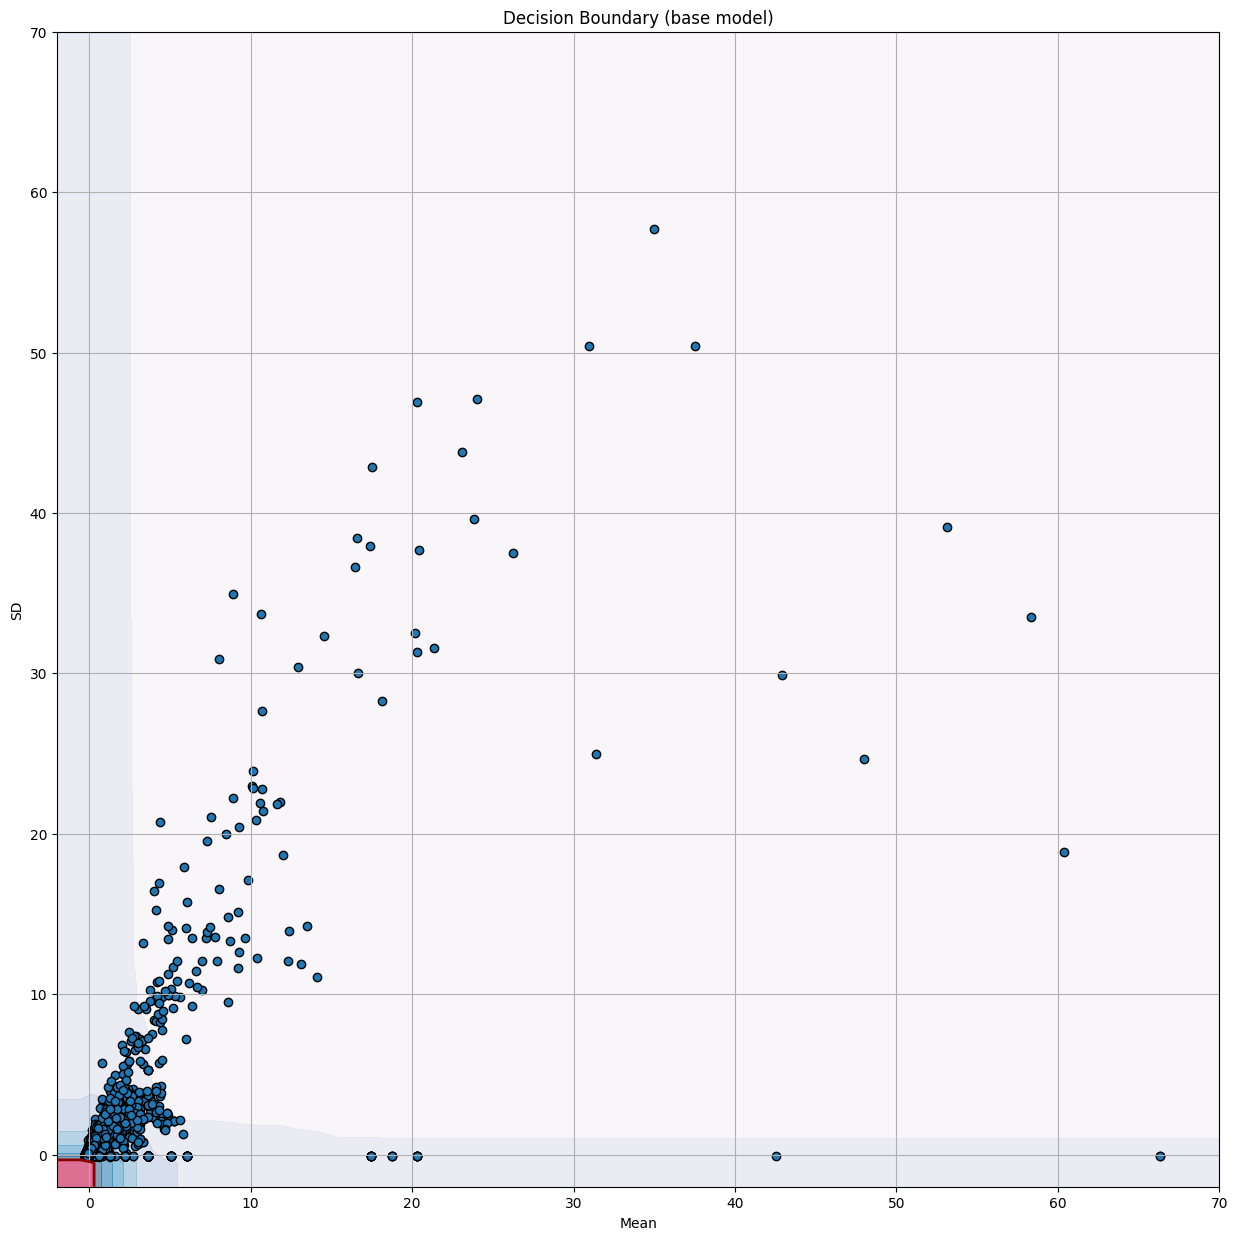

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Change the plot's size
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Decision Boundary (base model)")

# Draw the "soft" or secondary boundaries
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)

# Draw the line that separates the hard from the soft boundaries
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

# Draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# Plot training data points
plt.scatter(train_df.iloc[:, 0], train_df.iloc[:, 1], edgecolors='k')

plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

The plot you have on screen is the decision boundary of the isolation forest. Everything within the red region is what I call the “hard” decision boundary. It contains the inliers, or normal points. The rest are the outliers, or anomalies. Here, we can barely see the red region; it is extremely small compared to the rest of the space. Yet, it contains most of the points (around 85%) of the training dataset. However, the remaining 15% is still a lot of data, and it is probable that many of these points are data points that aren’t extremely anomalous or points that might even be false positives.

So, for this case, it would be wise to increase the decision boundary’s size, thus also reducing the points that would be classified as outliers by using the contamination hyperparameter.

## Retrain the Model with the contamination Hyperparameter

Retrain your Isolation Forest model using contamination=0.001. This tells the model to consider only 0.1% of the data as outliers:

In [7]:
clf_contaminated = IsolationForest(random_state=42, contamination=0.001)
clf_contaminated.fit(train_df)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.001, random_state=16)

## Replot the Decision Boundary

Plot the decision boundary for this newly trained model. The code is similar to before, but using the clf_contaminated model:

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


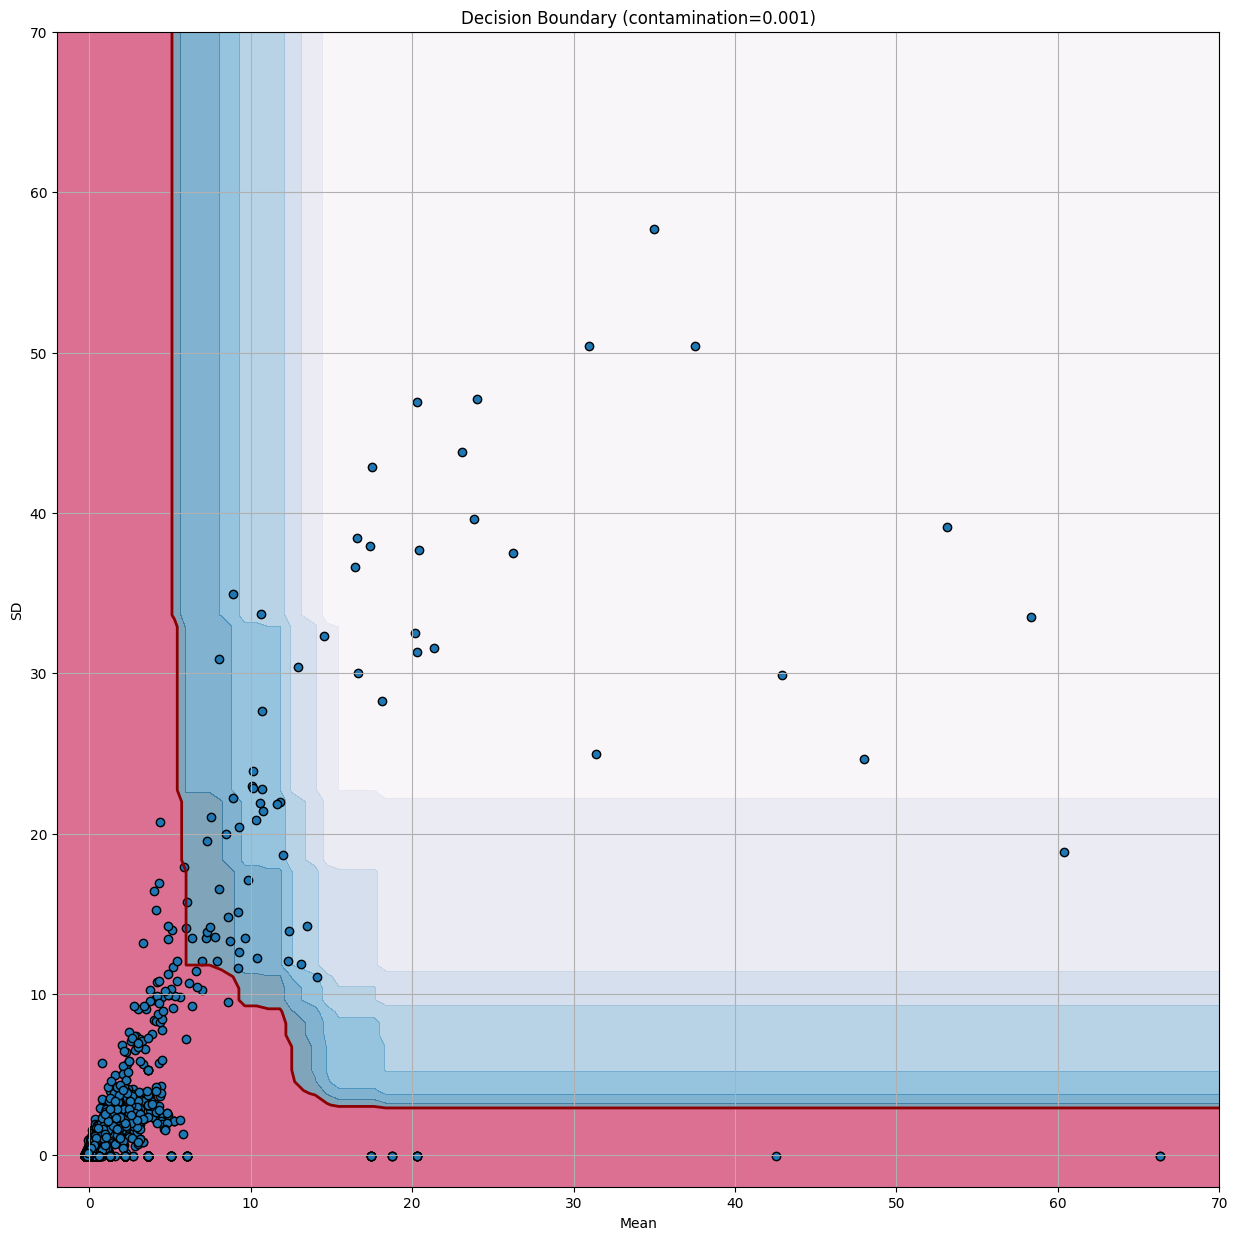

In [8]:
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf_contaminated.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=[15, 15])
plt.title("Decision Boundary (contamination=0.001)")

# Plot decision boundaries and training data
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(train_df.iloc[:, 0], train_df.iloc[:, 1], edgecolors='k')

plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()


## Predict with the Test Dataset
Use the predict() method to test the model with the test

dataset. This will classify each observation as an outlier (-1) or an inlier (1):

In [9]:
test_predictions = clf_contaminated.predict(test_df)

## Plot the Decision Boundary with Test Dataset
Now, visualize the decision boundary and plot the test dataset with color coding for inliers and outliers. Merge the test dataset with the predictions for plotting:

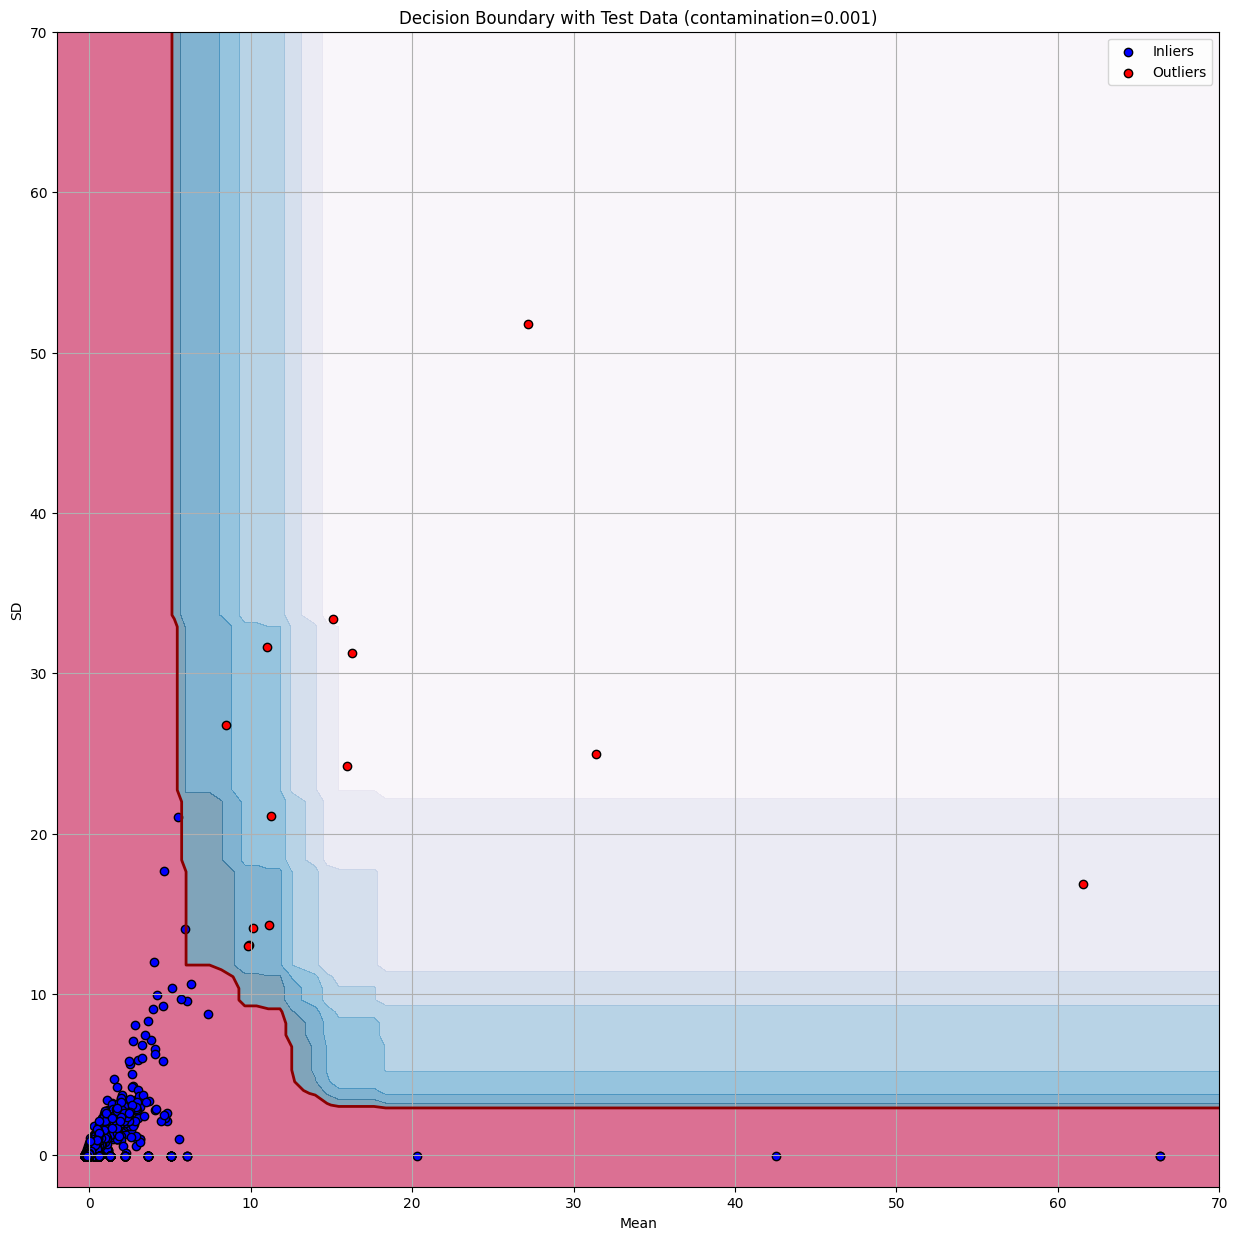

In [10]:
# Merge test dataset with predictions
merged_test = pd.concat([test_df, pd.Series(test_predictions, name='prediction')], axis=1)

# Extract inliers and outliers
inliers = merged_test[merged_test['prediction'] == 1]
outliers = merged_test[merged_test['prediction'] == -1]

# Plot decision boundary
plt.figure(figsize=[15, 15])
plt.title("Decision Boundary with Test Data (contamination=0.001)")

# Plot decision boundaries
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# Plot inliers and outliers
plt.scatter(inliers.iloc[:, 0], inliers.iloc[:, 1], edgecolors='k', color='blue', label='Inliers')
plt.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1], edgecolors='k', color='red', label='Outliers')

plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.legend()
plt.show()


This final plot shows the test data points overlaid on the decision boundary, with inliers in blue and outliers in red. The visualization should help you see how the model distinguishes between normal and anomalous data points within the context of the decision boundary established by the Isolation Forest.

## Export the isolation model to a pickle file

In [ ]:
import joblib
import os

# Save the model
joblib.dump(clf_contaminated, 'model.pkl')
# Define the directory path
directory = '/src/models'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

import joblib
import os

# Save the model
joblib.dump(clf_contaminated, 'model.pkl')
# Define the directory path
directory = '/src/models'

# Check if the file exists before moving it
if os.path.exists('model.pkl'):
    # Create the directory if it doesn't exist
    if not os.path.exists(directory): # Create the directory if it doesn't exist
        os.makedirs(directory)
    # Move the file to the directory
    os.rename('model.pkl', os.path.join(directory, 'model.pkl'))
else:
    print("Error: 'model.pkl' file not found.")
